### This script contains the following:
#### 01. Importing Visualization Libraries and Data
#### 02. Deriving New Variables
#### 03. Exploring Relationships
      correlation matrix heatmap (colored)
      scatterplot (or plots) for the variables with the strongest correlations
      pair plot of the entire data set
      Categorical Plots
#### 04. Revisit Questions Generated in Previous Excercise
#### 05. Define a hypothesis

### 01. Importing Visualization Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

/Users/schitchards/opt/anaconda3/envs/career/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


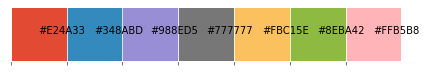

In [3]:
# Change style sheet
plt.style.use('ggplot')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']   
sns.palplot(colors)
ax = plt.gca()

for i, name in enumerate(colors):
    ax.text(i, 0, name)

In [4]:
# displays charts in the notebook without the need to "call" them specifically
%matplotlib inline

In [5]:
# Working Directory
working_directory=os.getcwd()
print(working_directory)

/Users/schitchards/Career Foundry/Achievement 6/Analysis


In [6]:
# Define path
path=r'/Users/schitchards/Career Foundry/Achievement 6'

In [7]:
# Create Dataframe
df=pd.read_csv(os.path.join(path,'Data','Prepared Data','e-commerce1.csv'))

### 02. Deriving New Variables

In [8]:
# Create column for price of items
df['Price']=(df['Sales']/df['Quantity'])*(1+df['Discount'])

In [9]:
# Break even price
df['Break Even Price']=(df['Sales']- df['Profit'])/df['Quantity']
df.head(5)

Unnamed: 0 Order Date  Row ID        Order ID       Ship Mode Customer ID  \
0           0    20-1-01     849  CA-2017-107503  Standard Class    GA-14725   
1           1    20-1-01    4010  CA-2017-144463  Standard Class    SC-20725   
2           2    20-1-01    6683  CA-2017-154466     First Class    DP-13390   
3           3    20-1-01    8070  CA-2017-151750  Standard Class    JM-15250   
4           4    20-1-01    8071  CA-2017-151750  Standard Class    JM-15250   

       Segment        Country         City       State  ...       Product ID  \
0     Consumer  United States       Lorain        Ohio  ...  FUR-FU-10003878   
1     Consumer  United States  Los Angeles  California  ...  FUR-FU-10001215   
2  Home Office  United States     Franklin   Wisconsin  ...  OFF-BI-10002012   
3     Consumer  United States   Huntsville       Texas  ...  OFF-ST-10002743   
4     Consumer  United States   Huntsville       Texas  ...  FUR-FU-10002116   

          Category Sub-Category  \
0        Furniture  Furnishings   
1        Furniture  Furnishings   
2  Office Supplies      Binders   
3  Office Supplies      Storage   
4        Furniture  Furnishings   

                                        Product Name    Sales Quantity  \
0                 Linden 10" Round Wall Clock, Black   48.896        4   
1  Howard Miller 11-1/2" Diameter Brentwood Wall ...  474.430       11   
2            Wilson Jones Easy Flow II Sheet Lifters    3.600        2   
3                      SAFCO Boltless Steel Shelving  454.560        5   
4  Tenex Carpeted, Granite-Look or Clear Contempo...  141.420        5   

   Discount    Profit     Price  Break Even Price  
0       0.2    8.5568   14.6688           10.0848  
1       0.0  199.2606   43.1300           25.0154  
2       0.0    1.7280    1.8000            0.9360  
3       0.2 -107.9580  109.0944          112.5036  
4       0.6 -187.3815   45.2544           65.7603  

[5 rows x 22 columns]

In [10]:
# Remove non numerical characers from Order ID and Customer ID to allow grouping
df['Customer ID'] = df['Customer ID'].str[3:]
df['Order ID'] = df['Order ID'].str[3:]
df['Order ID']=df['Order ID'].str.replace("-","")
df.head(5)

Unnamed: 0 Order Date  Row ID    Order ID       Ship Mode Customer ID  \
0           0    20-1-01     849  2017107503  Standard Class       14725   
1           1    20-1-01    4010  2017144463  Standard Class       20725   
2           2    20-1-01    6683  2017154466     First Class       13390   
3           3    20-1-01    8070  2017151750  Standard Class       15250   
4           4    20-1-01    8071  2017151750  Standard Class       15250   

       Segment        Country         City       State  ...       Product ID  \
0     Consumer  United States       Lorain        Ohio  ...  FUR-FU-10003878   
1     Consumer  United States  Los Angeles  California  ...  FUR-FU-10001215   
2  Home Office  United States     Franklin   Wisconsin  ...  OFF-BI-10002012   
3     Consumer  United States   Huntsville       Texas  ...  OFF-ST-10002743   
4     Consumer  United States   Huntsville       Texas  ...  FUR-FU-10002116   

          Category Sub-Category  \
0        Furniture  Furnishings   
1        Furniture  Furnishings   
2  Office Supplies      Binders   
3  Office Supplies      Storage   
4        Furniture  Furnishings   

                                        Product Name    Sales Quantity  \
0                 Linden 10" Round Wall Clock, Black   48.896        4   
1  Howard Miller 11-1/2" Diameter Brentwood Wall ...  474.430       11   
2            Wilson Jones Easy Flow II Sheet Lifters    3.600        2   
3                      SAFCO Boltless Steel Shelving  454.560        5   
4  Tenex Carpeted, Granite-Look or Clear Contempo...  141.420        5   

   Discount    Profit     Price  Break Even Price  
0       0.2    8.5568   14.6688           10.0848  
1       0.0  199.2606   43.1300           25.0154  
2       0.0    1.7280    1.8000            0.9360  
3       0.2 -107.9580  109.0944          112.5036  
4       0.6 -187.3815   45.2544           65.7603  

[5 rows x 22 columns]

In [11]:
#Add month column
df['Month']=pd.to_datetime(df['Order Date']).dt.month
df.head(5)

Unnamed: 0 Order Date  Row ID    Order ID       Ship Mode Customer ID  \
0           0    20-1-01     849  2017107503  Standard Class       14725   
1           1    20-1-01    4010  2017144463  Standard Class       20725   
2           2    20-1-01    6683  2017154466     First Class       13390   
3           3    20-1-01    8070  2017151750  Standard Class       15250   
4           4    20-1-01    8071  2017151750  Standard Class       15250   

       Segment        Country         City       State  ...         Category  \
0     Consumer  United States       Lorain        Ohio  ...        Furniture   
1     Consumer  United States  Los Angeles  California  ...        Furniture   
2  Home Office  United States     Franklin   Wisconsin  ...  Office Supplies   
3     Consumer  United States   Huntsville       Texas  ...  Office Supplies   
4     Consumer  United States   Huntsville       Texas  ...        Furniture   

  Sub-Category                                       Product Name    Sales  \
0  Furnishings                 Linden 10" Round Wall Clock, Black   48.896   
1  Furnishings  Howard Miller 11-1/2" Diameter Brentwood Wall ...  474.430   
2      Binders            Wilson Jones Easy Flow II Sheet Lifters    3.600   
3      Storage                      SAFCO Boltless Steel Shelving  454.560   
4  Furnishings  Tenex Carpeted, Granite-Look or Clear Contempo...  141.420   

  Quantity Discount    Profit     Price  Break Even Price  Month  
0        4      0.2    8.5568   14.6688           10.0848      1  
1       11      0.0  199.2606   43.1300           25.0154      1  
2        2      0.0    1.7280    1.8000            0.9360      1  
3        5      0.2 -107.9580  109.0944          112.5036      1  
4        5      0.6 -187.3815   45.2544           65.7603      1  

[5 rows x 23 columns]

### 03. Exploring Relationships

In [12]:
df.columns

Index(['Unnamed: 0', 'Order Date', 'Row ID', 'Order ID', 'Ship Mode',
       'Customer ID', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Price', 'Break Even Price',
       'Month'],
      dtype='object')

In [13]:
df.dtypes

Unnamed: 0            int64
Order Date           object
Row ID                int64
Order ID             object
Ship Mode            object
Customer ID          object
Segment              object
Country              object
City                 object
State                object
Postal Code           int64
Region               object
Product ID           object
Category             object
Sub-Category         object
Product Name         object
Sales               float64
Quantity              int64
Discount            float64
Profit              float64
Price               float64
Break Even Price    float64
Month                 int64
dtype: object

In [14]:
# Create a subset excluding the columns that do not contain pertinent information
sub = df[['Ship Mode','Segment','Country','City','State','Region','Category','Sub-Category','Product Name','Price','Sales','Quantity','Discount','Profit']]
sub.head(5)

Ship Mode      Segment        Country         City       State  \
0  Standard Class     Consumer  United States       Lorain        Ohio   
1  Standard Class     Consumer  United States  Los Angeles  California   
2     First Class  Home Office  United States     Franklin   Wisconsin   
3  Standard Class     Consumer  United States   Huntsville       Texas   
4  Standard Class     Consumer  United States   Huntsville       Texas   

    Region         Category Sub-Category  \
0     East        Furniture  Furnishings   
1     West        Furniture  Furnishings   
2  Central  Office Supplies      Binders   
3  Central  Office Supplies      Storage   
4  Central        Furniture  Furnishings   

                                        Product Name     Price    Sales  \
0                 Linden 10" Round Wall Clock, Black   14.6688   48.896   
1  Howard Miller 11-1/2" Diameter Brentwood Wall ...   43.1300  474.430   
2            Wilson Jones Easy Flow II Sheet Lifters    1.8000    3.600   
3                      SAFCO Boltless Steel Shelving  109.0944  454.560   
4  Tenex Carpeted, Granite-Look or Clear Contempo...   45.2544  141.420   

   Quantity  Discount    Profit  
0         4       0.2    8.5568  
1        11       0.0  199.2606  
2         2       0.0    1.7280  
3         5       0.2 -107.9580  
4         5       0.6 -187.3815

#### correlation matrix heatmap (colored)

In [15]:
# Compute the correlation matrix
corr = sub.corr()
corr

Price     Sales  Quantity  Discount    Profit
Price     1.000000  0.898343 -0.017113  0.005894  0.433347
Sales     0.898343  1.000000  0.191127 -0.033516  0.532312
Quantity -0.017113  0.191127  1.000000  0.019184  0.053766
Discount  0.005894 -0.033516  0.019184  1.000000 -0.218343
Profit    0.433347  0.532312  0.053766 -0.218343  1.000000

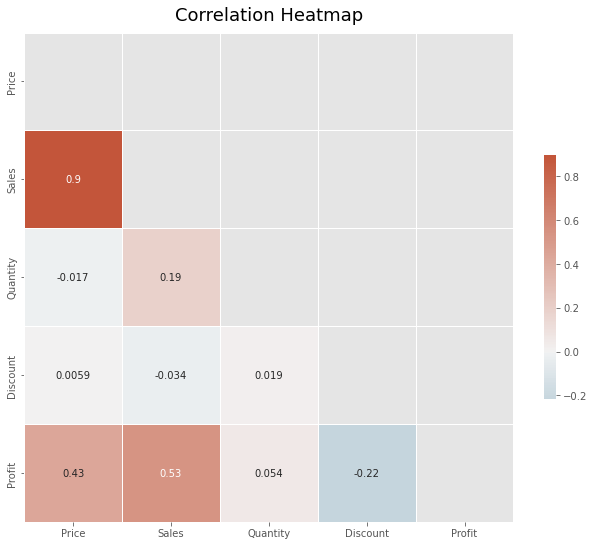

In [16]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
corr=sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
corr.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)# add title

plt.savefig(os.path.join(path,'Visualizations','heatmap.png'))

We can see that the heatmap shows a strong correlation between the price of an item and sales. This is due to the price of an item being derived from its sale price and quantity. There is also a moderate positive correlation between 'Sales' and 'Profit' but other then that, there are no other correlations with the numerical data.

#### scatterplot (or plots) for the variables with the strongest correlations

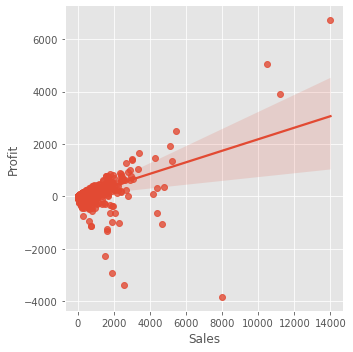

In [17]:
# Create a scatterplot for the "Sales" and "Profit" columns in seaborn
sns.lmplot(x = 'Sales', y = 'Profit', data = df)
plt.savefig(os.path.join(path,'Visualizations','scatterplot_sales.png'))

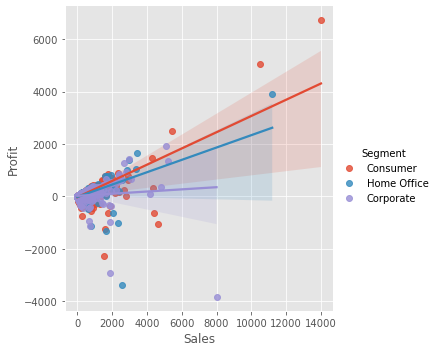

In [18]:
# Create a scatterplot for the "Sales" and "Profit" columns in seaborn by segment
sns.lmplot(x = 'Sales', y = 'Profit', data = df, hue='Segment')
plt.savefig(os.path.join(path,'Visualizations','scatterplot_segment.png'))

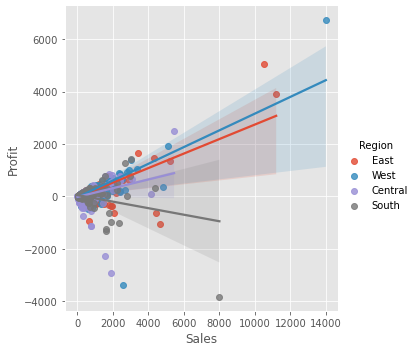

In [19]:
# Create a scatterplot for the "Sales" and "Profit" columns in seaborn by region
sns.lmplot(x = 'Sales', y = 'Profit', data = df, hue='Region')
plt.savefig(os.path.join(path,'Visualizations','scatterplot_region.png'))

Although there is a moderately positive relationship in the first graph we can see that this changes when adding a grouping element such as consumer(graph 2) or region(graph 3). There are lots of outliers both positive and negative, this tells us that there is lots of variability especialy as sales increase so the relationship between the two are not purely linear.

The scatterplot by regions shows that further investigation into the South region is necessary as their profits are decreasing as sales increase.

#### Pair plot of the entire data set

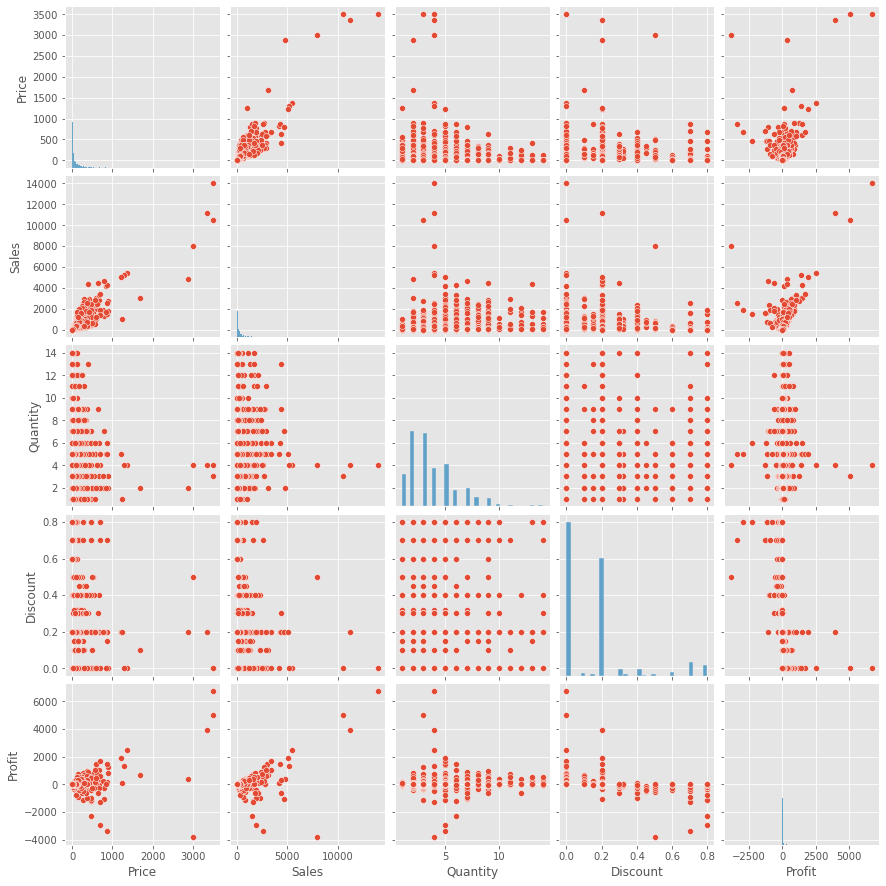

In [20]:
pp=sns.pairplot(sub)
plt.savefig(os.path.join(path,'Visualizations','spairplot.png'))

When looking at the crossed variables we can see that there is little in the form of relationships with the numerical variables. I would like to further investigate which items are the outliers when crossing 'Profit' and 'Sales' since some items are selling for high profits well others are selling at a significant loss. Scatterplot also makes it easier to see that after a discount greater than 20% items are selling at a loss or breaking even.

#### Categorical Plots

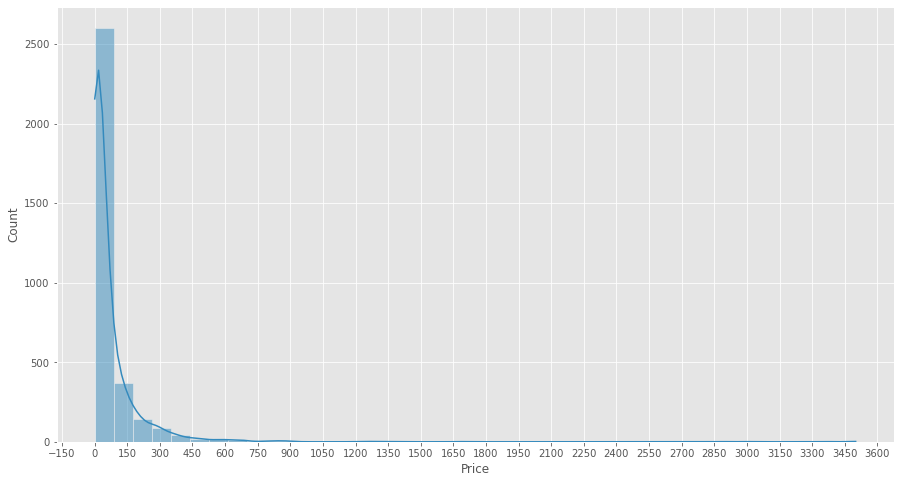

In [21]:
# Use a histogram to visualize the distribution of price to create categories for price
plt.figure(figsize=(15,8))

hist=sns.histplot(df['Price'],bins=40, kde=True) # kde adds a line that encompasses the distribution
hist.xaxis.set_major_locator(plt.MaxNLocator(30))
plt.savefig(os.path.join(path,'Visualizations','histogram_price_distribution.png'))

Most products are priced between $0 - $75

In [22]:
#Create Price categories
df.loc[df['Price'] < 75, 'Price category'] = 'Low price'
df.loc[(df['Price'] >= 75) & (df['Price'] < 225), 'Price category'] = 'Middle price'
df.loc[df['Price'] >= 225, 'Price category'] = 'High price'
df['Price category'].value_counts(dropna = False) # Show price category counts

Low price       2524
Middle price     550
High price       238
Name: Price category, dtype: int64

In [23]:
#Check Price Category output
df.columns

Index(['Unnamed: 0', 'Order Date', 'Row ID', 'Order ID', 'Ship Mode',
       'Customer ID', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Price', 'Break Even Price',
       'Month', 'Price category'],
      dtype='object')

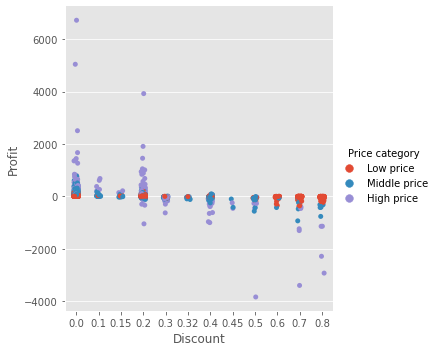

In [24]:
# Create categorical plot using price categories created above
#At what discount percentage are products selling at a loss?
g = sns.catplot(x='Discount', y='Profit', hue='Price category', data=df)
plt.savefig(os.path.join(path,'Visualizations','price_category_profits.png'))

We can see that after a 20% discount categories are no longer selling for profit with high priced items selling for the biggest loss.

In [25]:
# Create Profit Category
df.loc[df['Profit']< 0,'Profit Category']='Loss'
df.loc[df['Profit']==0,'Profit Category']='Break even'
df.loc[df['Profit']> 0,'Profit Category']='Profit'

#Check category counts
df['Profit Category'].value_counts(dropna=False)

Profit        2673
Loss           620
Break even      19
Name: Profit Category, dtype: int64

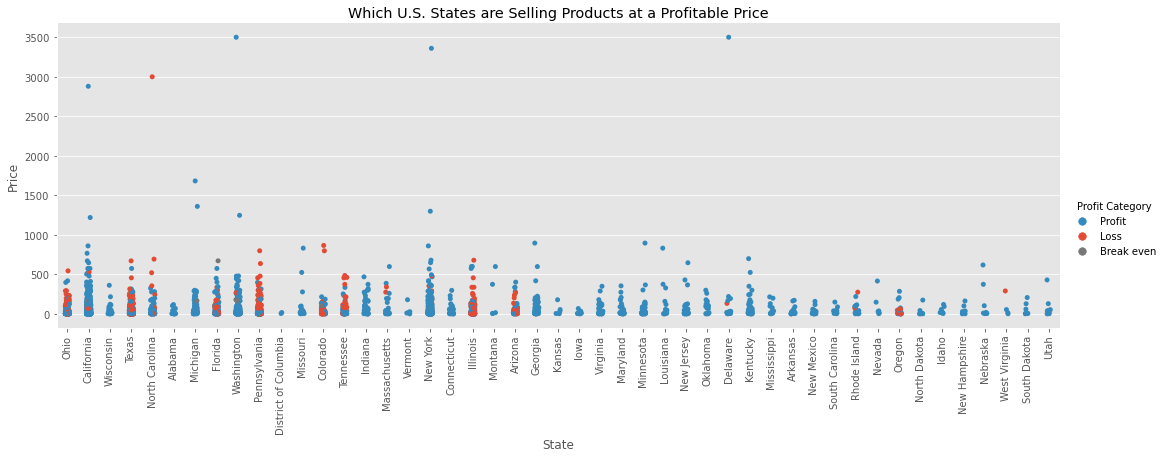

In [26]:
# Create categorical plot using price categories created above
plt.style.use('ggplot')
palette = {'Profit': '#348ABD', 'Loss':'#E24A33','Break even':'#777777'}

g = sns.catplot(x='State', y='Price', hue='Profit Category', data=df, height=5, aspect=3, palette = palette)
locs, labels = plt.xticks()
plt.xticks(rotation = 'vertical')
plt.title('Which U.S. States are Selling Products at a Profitable Price')
plt.savefig(os.path.join(path,'Visualizations','state_profitable_sales.png'))

From this catplot we can see that certain states such as; Ohio, Texas, Pennsylvania and Illinoise, sell a high number of products at a loss. Further enquiry into these states would be beneficial to increase overall profits.

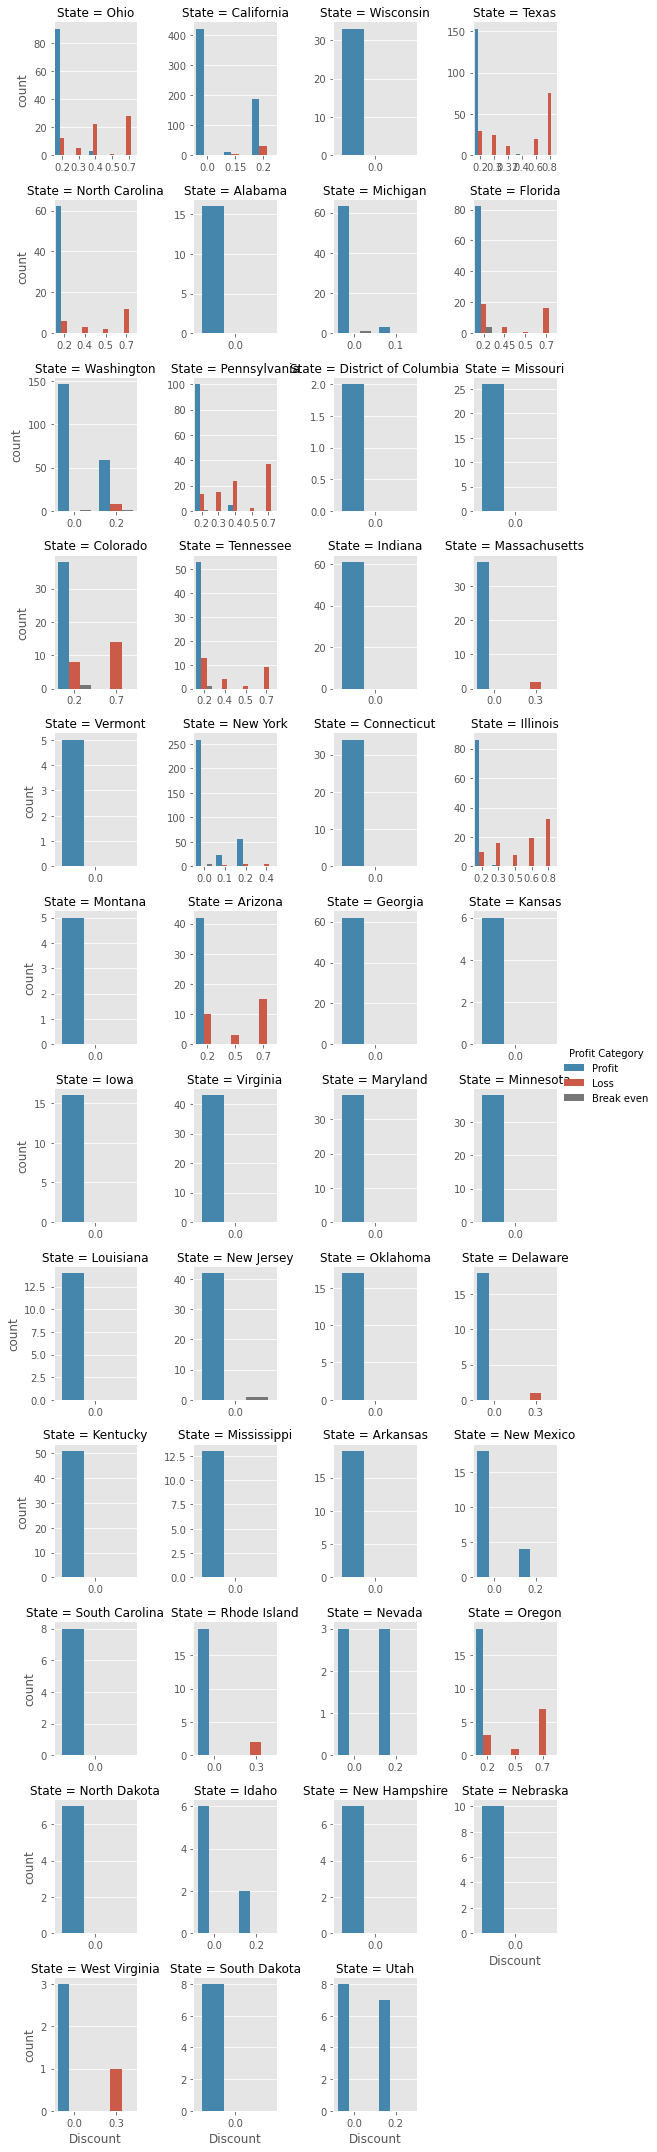

In [27]:
# Facet along the segment column to show a third categorical variable
palette = {'Profit': '#348ABD', 'Loss':'#E24A33','Break even':'#777777'}

seg = sns.catplot(x='Discount', hue='Profit Category', col='State', col_wrap= 4, palette=palette, data=df, kind='count',orient='v', sharex=False, sharey=False, height=2.5, aspect=.8)
plt.savefig(os.path.join(path,'Visualizations','state_discounts.png'))

The above catplot further breaks down each states count of orders by discount. This shows us exactly the amount of discounted products being sold. Further insights should be gained into why certain states are selling more products at discounts.

### 04. Revisit Questions Generated in Previous Excercise

#### Whats the best month for sales?

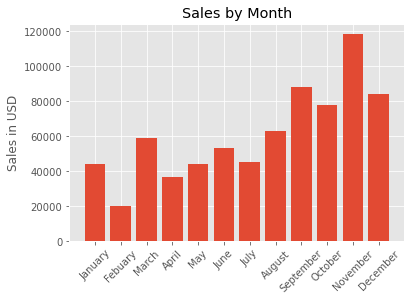

In [28]:
#Best month for sales?
months = range(1,13) # for x axes
results= df.groupby('Month').sum()
ticks=[1,2,3,4,5,6,7,8,9,10,11,12]
labels = ['January','Febuary','March','April','May','June','July','August','September','October','November','December']

plt.bar(months, results['Sales'])
plt.xticks(ticks, labels)
lables, location = plt.yticks()
plt.ylabel('Sales in USD')
plt.xticks(rotation=45)
plt.title('Sales by Month')
plt.savefig(os.path.join(path,'Visualizations','monthly_sales.png'))

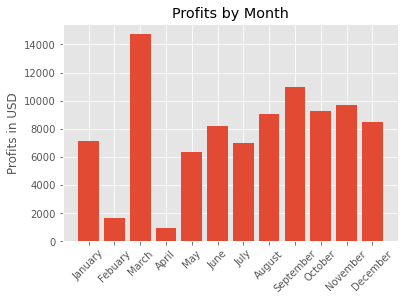

In [29]:
#Best month for profits?
months = range(1,13) # for x axes
results= df.groupby('Month').sum()
ticks=[1,2,3,4,5,6,7,8,9,10,11,12]
labels = ['January','Febuary','March','April','May','June','July','August','September','October','November','December']

plt.bar(months, results['Profit'])
plt.xticks(ticks, labels)
lables, location = plt.yticks()
plt.ylabel('Profits in USD')
plt.xticks(rotation=45)
plt.title('Profits by Month')
plt.savefig(os.path.join(path,'Visualizations','monthly_profits.png'))

The highest sales are between September to December and the lowest are in February. Monthly profits don't completely coincide with sales with March being the most profitable month and April being the least. Comparing these graphs to sale events might help explain these discrepencies. It might also be beneficial to increase marketing during lower sales months to increase sales.

#### What State has the highest sales?

In [30]:
#What State sold the most product?
df_sales= df[['State','Sales','Quantity','Profit']]
results2 = df_sales.groupby('State').sum().sort_values(by = ['Sales'], ascending = False)
results2

Sales  Quantity      Profit
State                                                  
California            146388.3445      2633  29366.4589
New York               93922.9950      1319  24357.0717
Washington             65539.8960       806  17256.7798
Texas                  43421.7582      1158  -8838.5049
Pennsylvania           42688.3060       713  -5112.8034
Florida                26444.7155       414    244.1266
Michigan               25833.6490       258   8487.7618
Illinois               24351.6110       632  -6745.5600
North Carolina         23456.8290       335  -5088.5334
Ohio                   23264.8500       603  -1736.5270
Georgia                19160.0200       235   6447.9819
Indiana                18516.4500       229   5139.5257
Tennessee              16113.8230       304  -3304.2866
Kentucky               15534.8400       186   4751.7214
Delaware               13754.9830        83   6053.2049
Arizona                11133.5370       258  -1276.0025
Colorado               10299.8130       240  -4435.8483
New Jersey              9483.5500       140   2266.0707
Maryland                9451.6000       156   2780.6070
Missouri                9350.8000       113   1733.4305
Massachusetts           8143.0760       137   1710.5869
Virginia                7600.2000       162   1806.0146
Minnesota               6728.2500       138   2459.8789
Oklahoma                6225.9100        64   1754.7516
Wisconsin               5567.4700       125   1523.0807
Louisiana               5501.5500        50   1212.9041
Connecticut             5307.2100       104   1479.7616
Montana                 4229.2800        18   1465.9255
Nebraska                3579.3500        31    921.0303
Rhode Island            3427.1100        75    467.4135
Nevada                  3138.1580        28    305.1947
Mississippi             2997.2400        59   1028.5620
Oregon                  2886.5930       109   -377.1257
New Mexico              2818.5580        98    827.3904
Arkansas                2707.6400        78    959.4027
Utah                    2460.6380        54    477.1747
Alabama                 1828.2500        57    496.3771
South Carolina          1560.7500        35    294.6375
New Hampshire           1509.4300        39    480.2140
Idaho                   1233.5480        26    199.0086
West Virginia           1209.8240        18    185.9216
South Dakota            1153.4100        32    346.0717
North Dakota             919.9100        30    230.1497
Vermont                  842.2100        16    263.9759
Kansas                   733.1500        19    263.3644
Iowa                     716.4100        51    275.8638
District of Columbia      77.7600         8     35.0640

California is the top selling state but we can also see that there are many top states that are not profitable, such as Texas and Pennsylvania. When looking at our catplot above we can see that they are selling a high volume of products at a discounted price with many items selling at 80% off.

#### Are there certain states that order more?

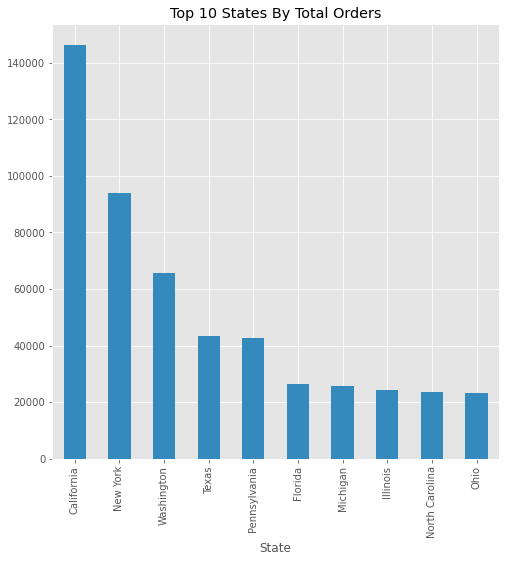

In [31]:
#What are the top selling states?
lg=df.groupby('State').agg({'Sales':'sum'})['Sales'].nlargest(10)
lg.plot(kind='bar', figsize=(8,8), color= '#348ABD')
plt.title('Top 10 States By Total Orders')
plt.savefig(os.path.join(path,'Visualizations','top_state_sales.png'))

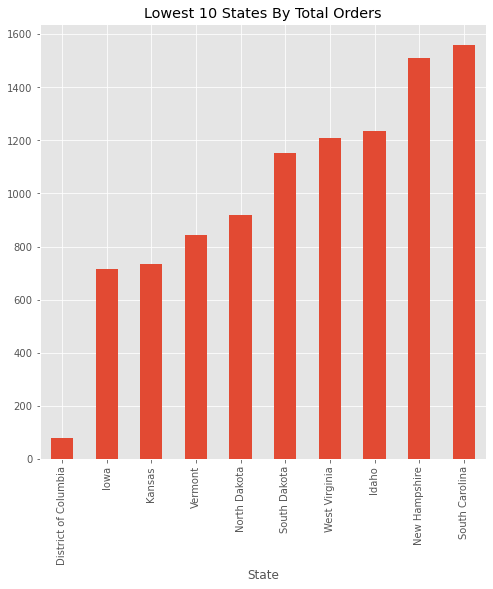

In [32]:
#What are the lowest selling states?
sm=df.groupby('State').agg({'Sales':'sum'})['Sales'].nsmallest(10)
sm.plot(kind='bar', figsize=(8,8))
plt.title('Lowest 10 States By Total Orders')
plt.savefig(os.path.join(path,'Visualizations','bottom_states_sales.png'))

California is the top state for orders and District of Columbia is the lowest.

Text(0, 0.5, 'Region')

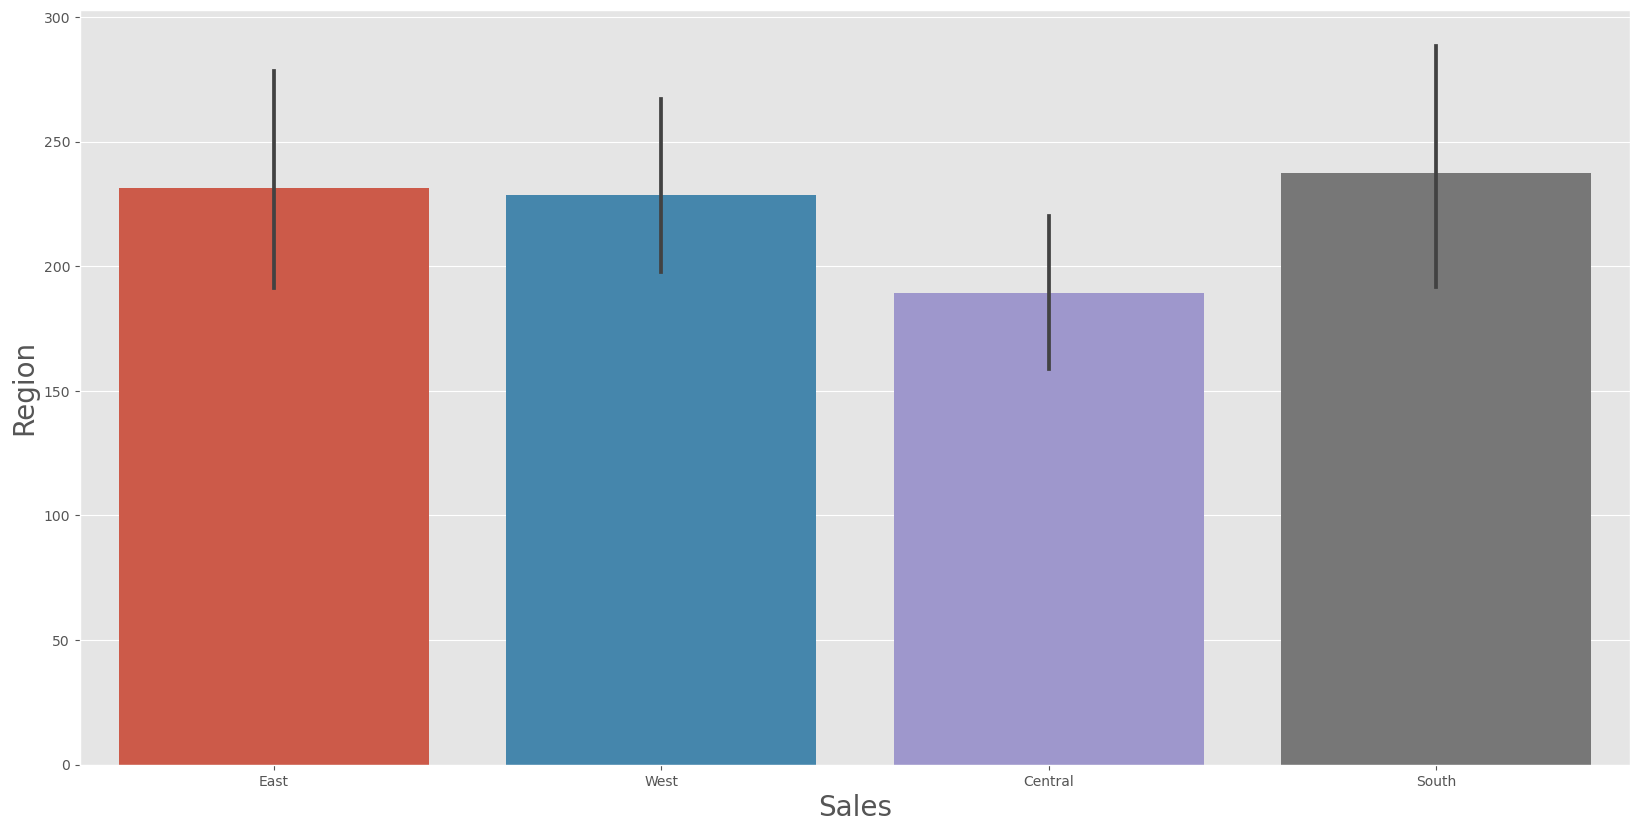

In [240]:
# Check the relationship between the sale and the region
plt.figure(figsize = (20,10),dpi = 100)
 
ax = sns.barplot(x = 'Region', y = 'Sales', data= df)
plt.xlabel('Sales',fontsize = '20')
plt.ylabel('Region',fontsize = '20')


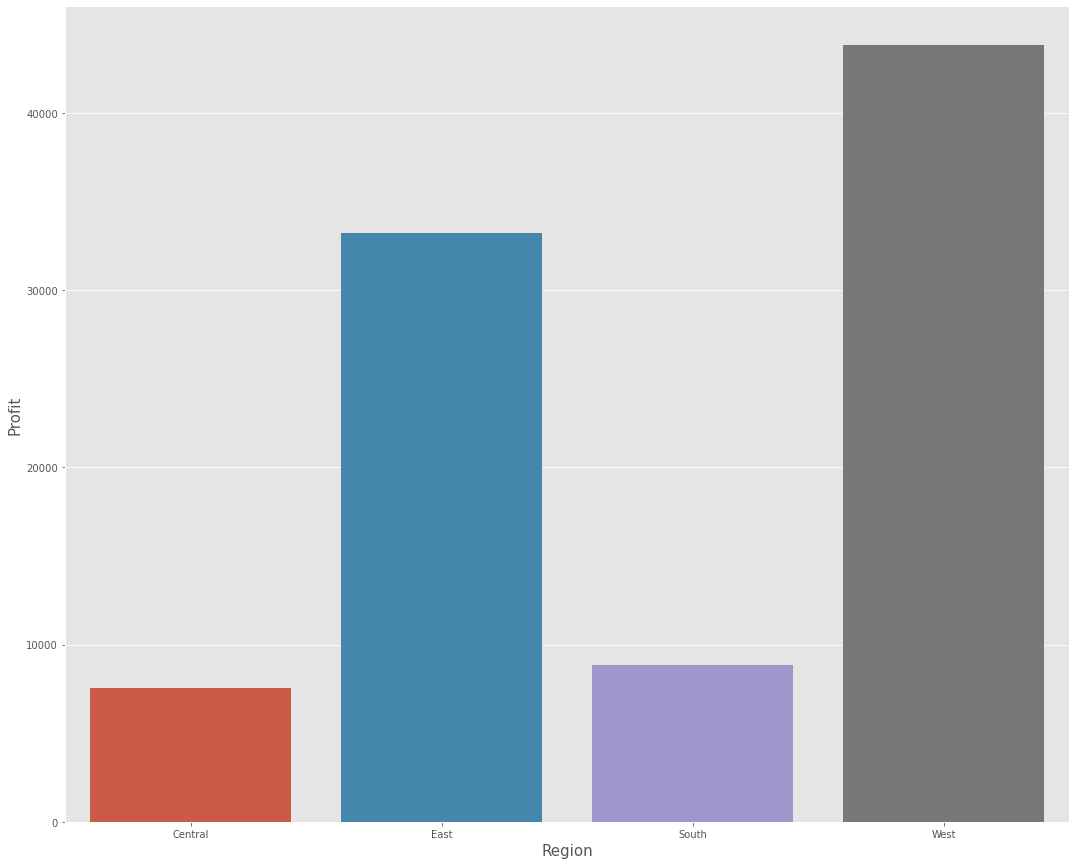

In [244]:
# Regional profitability
region_profit = df.groupby('Region')['Profit'].sum()
plt.figure(figsize=(18,15))
sns.barplot(x=region_profit.index,y=region_profit.values)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Profit',fontsize=15)
plt.savefig(os.path.join(path,'Visualizations','regional_profits.png'))

#### What category is the most/least profitable?

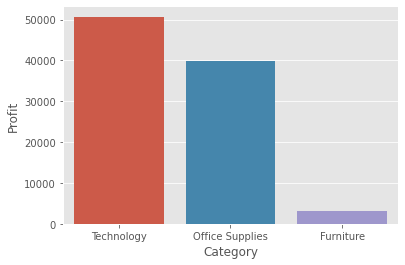

In [33]:
category=df[['Category', 'Profit']].groupby(['Category'], as_index=False).sum().sort_values(by='Profit', ascending=False)

sns.barplot(x='Category',y='Profit', data=category)
plt.savefig(os.path.join(path,'Visualizations','category_profits.png'))

We can see that technology is the most profitable wherease furniture is just breaking even. It may be beneficial to the company to drop their furniture category or further examine why it is functioning at such low profits.

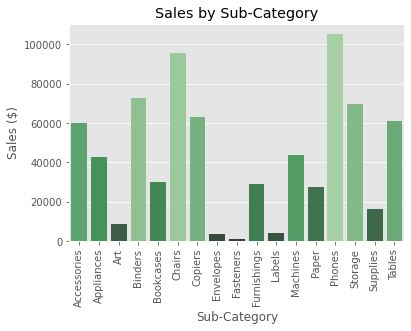

In [193]:
# What sub-categories have the highest sales
# Group data by sub-category
sub_grouped= df.groupby('Sub-Category').agg('Sales').sum()

# Create Chart
pal = sns.color_palette("Greens_d", len(data))
rank = sub_grouped.argsort().argsort()

fig = sns.barplot(sub_grouped.index, sub_grouped.values, palette=np.array(pal[::-1])[rank])
plt.xticks(rotation = 90)
plt.ylabel('Sales ($)')
plt.title('Sales by Sub-Category')
plt.savefig(os.path.join(path,'Visualizations','sub-category_sales.png'))

#### Are some products more popular than others geographically?

Will wait to answer using mapping

#### Do sales and/or discounts fluctuate seasonally?

Will wait to answer using time-series

#### What products are most often sold together?

In [34]:
# Create new df to seperate the duplicated values of Order ID
df_bundles = df[df['Order ID'].duplicated(keep=False)]

In [35]:
# Join products with the same order ID into the same line
df_bundles['Product Bundle'] = df_bundles.groupby('Order ID')['Product Name'].transform(lambda x: ','.join(x))

# Drop the duplicate values
df_bundles = df_bundles[['Order ID','Product Bundle']].drop_duplicates()

df_bundles.head()

Order ID                                     Product Bundle
3   2017151750  SAFCO Boltless Steel Shelving,Tenex Carpeted, ...
10  2017113481  Cisco CP-7937G Unified IP Conference Station P...
13  2017147207  Newell 319,Hoover Commercial SteamVac,Bevis Ov...
19  2017111738  GBC ProClick 150 Presentation Binding System,M...
24  2017123862  Eldon Fold 'N Roll Cart System,Tennsco Commerc...

In [36]:
# Count Product Bundles
#Import libraries
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_bundles['Product Bundle']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2))) # Counting all the 2 products bundles
    
count.most_common(5)

[(('Adams Telephone Message Book W/Dividers/Space For Phone Numbers',
   ' 5 1/4"X8 1/2"'),
  7),
 (('Acco Pressboard Covers with Storage Hooks', ' 14 7/8" x 11"'), 6),
 (("Global Wood Trimmed Manager's Task Chair", ' Khaki'), 6),
 (('Avery Durable Slant Ring Binders', ' No Labels'), 5),
 (('Cardinal HOLDit! Binder Insert Strips', 'Extra Strips'), 5)]

We can see that there are few products commonly bundled together, with the max combination only being 7 transactions. Creating an often bought together section below items will help increase order sizes.

#### What products sold the most? Why?

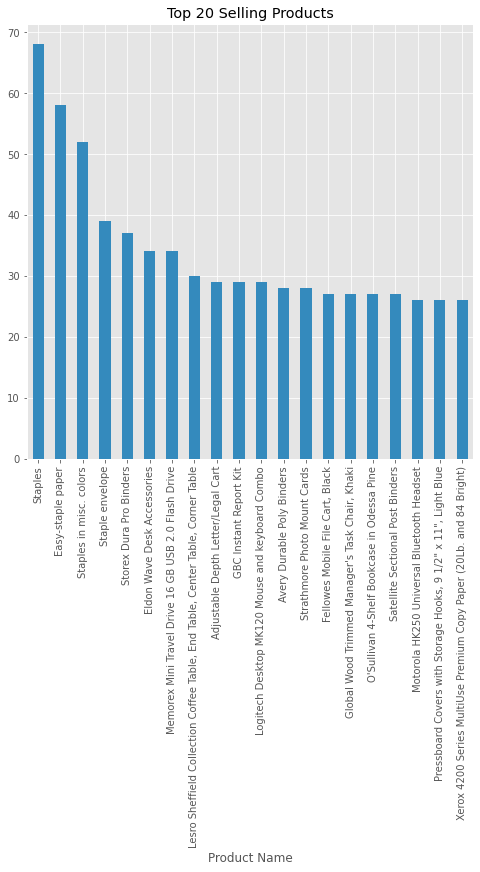

In [37]:
#What are the top 20 selling products?
top=df.groupby('Product Name').agg({'Quantity':'sum'})['Quantity'].nlargest(20)
top.plot(kind='bar', figsize=(8,8), color= '#348ABD')
plt.title('Top 20 Selling Products')
plt.savefig(os.path.join(path,'Visualizations','top_products.png'))

In [101]:
# Create dataframe of the top 20 products
product_grouped= df.groupby('Product Name').agg({'Quantity':'sum', 'Price':'mean'})
product_grouped

top_20 = product_grouped.nlargest(20, 'Quantity')
top_20

Quantity       Price
Product Name                                                            
Staples                                                   68    4.203493
Easy-staple paper                                         58   22.279200
Staples in misc. colors                                   52    6.882700
Staple envelope                                           39    8.945309
Storex Dura Pro Binders                                   37    3.727350
Eldon Wave Desk Accessories                               34    5.080880
Memorex Mini Travel Drive 16 GB USB 2.0 Flash D...        34   15.970000
Lesro Sheffield Collection Coffee Table, End Ta...        30   68.991000
Adjustable Depth Letter/Legal Cart                        29  179.386171
GBC Instant Report Kit                                    29    4.032967
Logitech Desktop MK120 Mouse and keyboard Combo           29   16.173029
Avery Durable Poly Binders                                28    3.082975
Strathmore Photo Mount Cards                              28    6.663771
Fellowes Mobile File Cart, Black                          27   61.185120
Global Wood Trimmed Manager's Task Chair, Khaki           27   85.066300
O'Sullivan 4-Shelf Bookcase in Odessa Pine                27   95.755670
Satellite Sectional Post Binders                          27   34.655650
Motorola HK250 Universal Bluetooth Headset                26   22.438240
Pressboard Covers with Storage Hooks, 9 1/2" x ...        26    3.424725
Xerox 4200 Series MultiUse Premium Copy Paper (...        26    5.174400

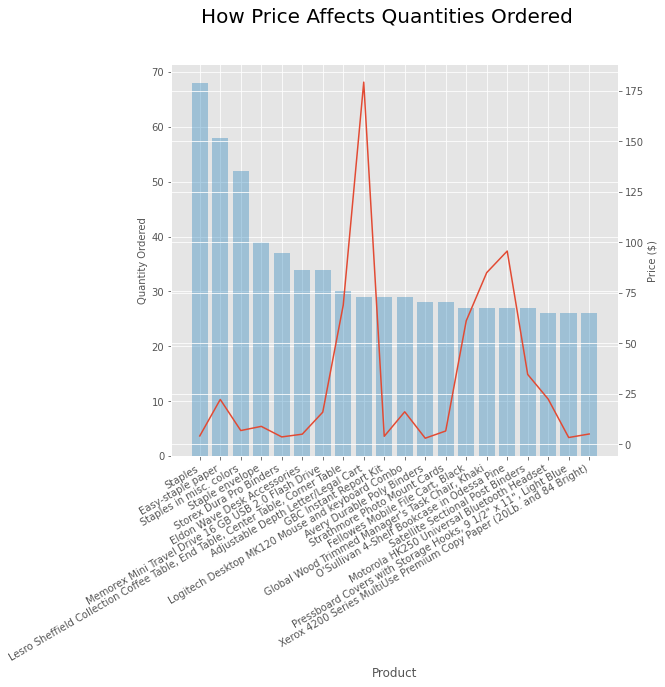

In [197]:
# Compare how price affects quantity sold
fig, ax1 = plt.subplots(figsize =(8,8))
ax2 = ax1.twinx()

ax1.bar(x=top_20.index, height=top_20['Quantity'], alpha=0.4, color= '#348ABD')
ax2.plot(top_20.index, top_20['Price'])

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', fontsize = 10)
ax1.tick_params(axis='y')
ax1.set_xticklabels(top_20.index, rotation='vertical')

ax2.set_ylabel('Price ($)', fontsize=10)
ax2.tick_params(axis='y')

fig.autofmt_xdate()
fig.suptitle('How Price Affects Quantities Ordered', fontsize=20)

plt.savefig(os.path.join(path,'Visualizations','price_affect_quantity.png'))

Most high quantity selling products are low in price except for furniture like items that are necessary items to furnish offices.

#### Which customer segments generate the most income?

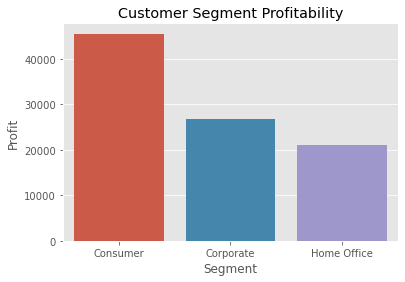

In [108]:
segment= df[['Segment','Profit']].groupby(['Segment'], as_index=False).sum().sort_values(by='Profit', ascending=False)

sns.barplot(x='Segment', y='Profit', data=segment).set(title='Customer Segment Profitability')
plt.savefig(os.path.join(path,'Visualizations','top_segment.png'))

Consumers are the most profitable  and home office is the least. With increasing amounts of people workign from home this could be an important segment to look for growth.

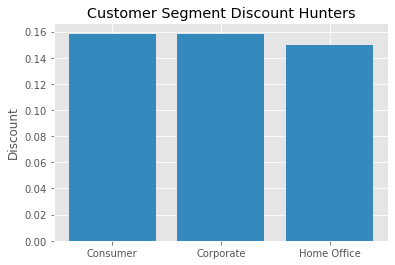

In [231]:
#Which customer segments are more inclined to shop for sales?
discount=df.groupby('Segment')['Discount'].mean()

plt.bar(x=discount.index, height=discount.values, color= '#348ABD')
plt.title('Customer Segment Discount Hunters')
plt.ylabel('Discount')
plt.savefig(os.path.join(path,'Visualizations','Segment_discount_hunters.png'))

We can see that there is not a high variation in customer segment discount shopping.

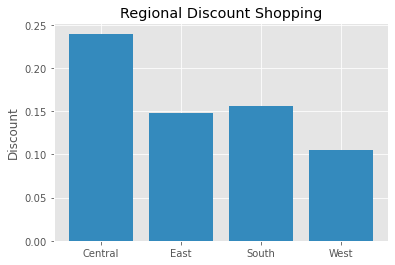

In [230]:
# What regions shop the most for discounts?

discount_region=df.groupby('Region')['Discount'].mean()

plt.bar(x=discount_region.index, height=discount_region.values, color= '#348ABD')
plt.title('Regional Discount Shopping')
plt.ylabel('Discount')
plt.savefig(os.path.join(path,'Visualizations','regional_discount_hunters.png'))

Central U.S. shops the most for discounted items with an average discount earned nearly 15% more than the West.

#### Do discounted items generate profits at any point?

Text(0, 0.5, 'Profit')

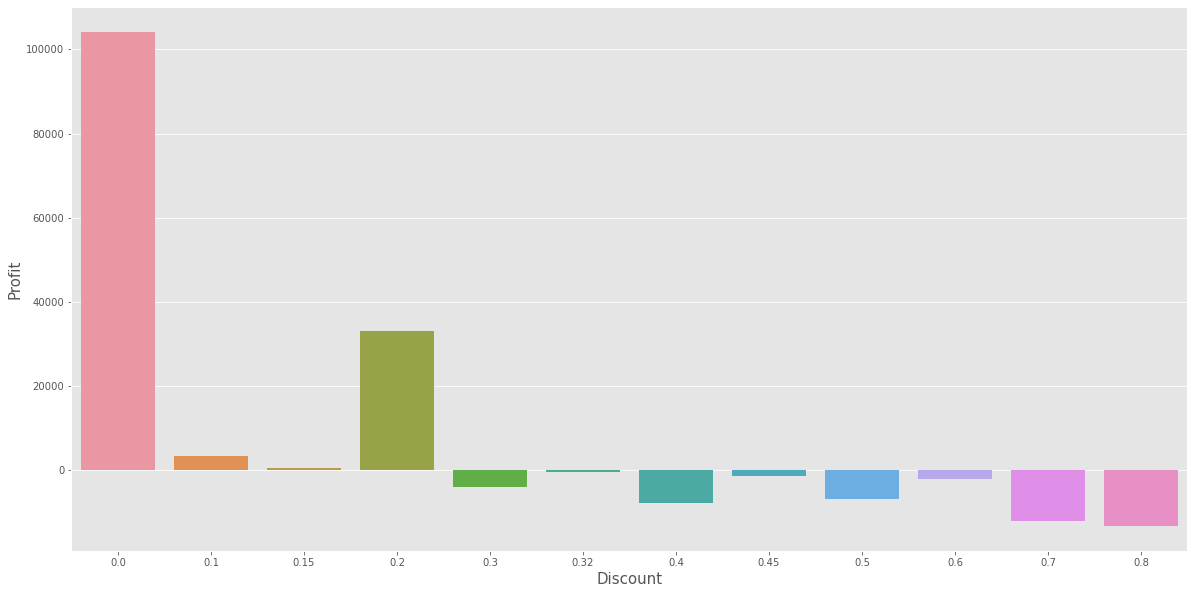

In [233]:
# Plotting profits against discounts
profit_discount = df.groupby('Discount')['Profit'].sum()
plt.figure(figsize=(20,10))
sns.barplot(x=profit_discount.index,y=profit_discount.values)
plt.xlabel('Discount', fontsize=15)
plt.ylabel('Profit',fontsize=15)

The only discounts that still generate profits are 10%-20% the rest all result in proft loss.

#### Does quantity purchased increase with discounts? 

No correlation between quantity and discounts

### Define a hypothesis

In [243]:
# Hypothesis 1
## (Ho)The average order is greater than the mean order if items are discounted.
    # (H1)The average order does not change or is smaller if items are discounted.
# Hypothesis 2
## (Ho)Items discounted more than 20% do not generate profits.
    # (H1)Items discounted more than 20% generate profits.
# Hypothesis 3
## (Ho)If we max discounts at 20%, underperforming states profits will increase.
    # (H1)Profits will decrease if discounts are maxed at 20% in underperforming states.
# Hypothesis 4
## (Ho)Profits will increase if we remove the furniture category from sales.
    # (H1)Profits will decrease if we remove the furniture category.
# Hypothesis 5
## (Ho)Mean disposable income is lower in Central and Southern U.S. than the rest of the regions
    # (H1)Mean disposable income is the same or higher in Central and Southern U.S. than the rest of the regions.

In [204]:
df.to_csv(os.path.join(path,'Data','Prepared Data','df6_2.csv'))